In [102]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../input/naver-finance/2015_12.csv")

In [3]:
df.head()

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
0,AK홀딩스,28071.4790,3.787,-1.334,-374.43063,-7.677,-1.421,15.1196,-3245.7412,43497.723,211899.220,-19.47167,1.45295,0.29825,63200.0,56000.0
1,BGF,43342.8000,4.236,3.526,1528.41270,22.771,10.327,271.9567,3071.8716,15605.457,87779.875,28.77862,5.66495,1.00711,44202.0,42140.0
2,BNK금융지주,51740.2540,13.455,10.253,5304.71200,9.116,0.609,NaN,1853.1799,21665.062,19749.037,4.54354,0.38864,0.42635,8420.0,8680.0
3,BYC,1821.9598,11.598,7.222,131.58138,3.546,2.024,13.2353,15693.8080,453030.620,216899.980,29.27907,1.01428,2.11849,459500.0,397000.0
4,CJ,211667.0800,5.789,2.604,5511.15530,5.874,2.365,5.8208,5780.6260,110304.560,594563.900,40.94442,2.14574,0.39808,236684.0,176334.0


**** EDA ****

-> 데이터의 특성을 발견하는 과정
1. Metadata -> data about data 
* 데이터의 크기
* 컬럼명
* 데이터 타입
* 비이있는 데이터 
* etc 

2. Univariate descriptive statistics -> 컬럼별로 평균이라든지 분포를 확인하는 것 

현업에서는 EDA를 엄격하게 2가지 파트로 나누지는 않지만 데이터를 자세히 들여다보는 전체 프로세스를 통틀어서 EDA라고 한다.

# MetaData

In [4]:
df.shape

(681, 16)

In [5]:
df.dtypes.value_counts()

float64    15
object      1
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     681 non-null    object 
 1   매출액(억원)    680 non-null    float64
 2   영업이익률(%)   680 non-null    float64
 3   순이익률(%)    680 non-null    float64
 4   당기순이익(억원)  680 non-null    float64
 5   ROE(%)     665 non-null    float64
 6   ROA(%)     665 non-null    float64
 7   ROIC(%)    611 non-null    float64
 8   EPS(원)     681 non-null    float64
 9   BPS(원)     681 non-null    float64
 10  SPS(원)     681 non-null    float64
 11  PER(배)     668 non-null    float64
 12  PBR(배)     681 non-null    float64
 13  PSR(배)     668 non-null    float64
 14  price      681 non-null    float64
 15  price2     681 non-null    float64
dtypes: float64(15), object(1)
memory usage: 85.2+ KB


In [7]:
df['ticker'].dtype

dtype('O')

In [8]:
# 컬렴명을 변경
df = df.rename(columns={"ticker":"종목명"})
df.head()

,종목명,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
0,AK홀딩스,28071.4790,3.787,-1.334,-374.43063,-7.677,-1.421,15.1196,-3245.7412,43497.723,211899.220,-19.47167,1.45295,0.29825,63200.0,56000.0
1,BGF,43342.8000,4.236,3.526,1528.41270,22.771,10.327,271.9567,3071.8716,15605.457,87779.875,28.77862,5.66495,1.00711,44202.0,42140.0
2,BNK금융지주,51740.2540,13.455,10.253,5304.71200,9.116,0.609,NaN,1853.1799,21665.062,19749.037,4.54354,0.38864,0.42635,8420.0,8680.0
3,BYC,1821.9598,11.598,7.222,131.58138,3.546,2.024,13.2353,15693.8080,453030.620,216899.980,29.27907,1.01428,2.11849,459500.0,397000.0
4,CJ,211667.0800,5.789,2.604,5511.15530,5.874,2.365,5.8208,5780.6260,110304.560,594563.900,40.94442,2.14574,0.39808,236684.0,176334.0


# describe()

In [9]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)


In [10]:
df.shape

(681, 16)

In [11]:
# 빈 값 = null value = nan value = nan
df.describe()


,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
count,680.000,680.000,680.000,680.000,665.000,665.000,611.000,681.000,681.000,681.000,668.000,681.000,668.000,681.000,681.000
mean,30112.802,3.882,7.669,1312.761,4.512,1.837,-3.009,426.081,47451.880,95471.752,18.921,1.582,1.922,47344.200,41784.562
std,108134.170,13.143,151.567,10133.596,130.083,9.512,195.156,34193.002,152959.285,316794.457,134.916,2.040,19.849,117063.700,96318.573
min,3.561,-191.601,-193.426,-22092.438,-529.306,-136.813,-4685.987,-844700.060,-230961.190,50.177,-1435.921,-2.829,0.011,158.000,154.000
25%,1727.089,1.532,0.369,10.859,0.828,0.275,1.357,22.964,4110.551,7504.220,4.674,0.622,0.310,3903.000,4060.000
50%,4692.060,4.194,3.067,118.918,5.350,2.305,5.208,539.109,10988.989,22559.920,11.743,0.957,0.590,12018.000,10900.000
75%,15243.673,8.314,6.612,504.201,9.766,5.338,10.550,2197.652,39550.230,72356.336,24.062,1.672,1.142,40496.000,39750.000
max,2006534.900,64.273,3923.338,190601.440,3122.573,60.287,271.957,93713.010,3017474.000,5553036.500,2808.262,21.154,511.718,1225000.000,1064000.000


각각의 컬럼들에 대해서 분석을 할 필요가 있다.
근데 현재 데이터가 보기 힘들기 때문에 xy 축을 바꿀 수 있다.




In [12]:
a = df.describe().T
a

,count,mean,std,min,25%,50%,75%,max
매출액(억원),680.000,30112.802,108134.170,3.561,1727.089,4692.060,15243.673,2006534.900
영업이익률(%),680.000,3.882,13.143,-191.601,1.532,4.194,8.314,64.273
순이익률(%),680.000,7.669,151.567,-193.426,0.369,3.067,6.612,3923.338
당기순이익(억원),680.000,1312.761,10133.596,-22092.438,10.859,118.918,504.201,190601.440
ROE(%),665.000,4.512,130.083,-529.306,0.828,5.350,9.766,3122.573
ROA(%),665.000,1.837,9.512,-136.813,0.275,2.305,5.338,60.287
ROIC(%),611.000,-3.009,195.156,-4685.987,1.357,5.208,10.550,271.957
EPS(원),681.000,426.081,34193.002,-844700.060,22.964,539.109,2197.652,93713.010
BPS(원),681.000,47451.880,152959.285,-230961.190,4110.551,10988.989,39550.230,3017474.000
SPS(원),681.000,95471.752,316794.457,50.177,7504.220,22559.920,72356.336,5553036.500


현재 종목명이 없어 진 것을 볼 수 있는데, 이는 
종목명이 string 이기 때문이다.
describe 함수에서 자동으로 int, float 같이 


In [13]:
# include 로 어떠한 타입만 지정해서 보여줄 것인지 정할 수 있다.
# 해당 code는 default 랑 동일 
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
매출액(억원),680.000,30112.802,108134.170,3.561,1727.089,4692.060,15243.673,2006534.900
영업이익률(%),680.000,3.882,13.143,-191.601,1.532,4.194,8.314,64.273
순이익률(%),680.000,7.669,151.567,-193.426,0.369,3.067,6.612,3923.338
당기순이익(억원),680.000,1312.761,10133.596,-22092.438,10.859,118.918,504.201,190601.440
ROE(%),665.000,4.512,130.083,-529.306,0.828,5.350,9.766,3122.573
ROA(%),665.000,1.837,9.512,-136.813,0.275,2.305,5.338,60.287
ROIC(%),611.000,-3.009,195.156,-4685.987,1.357,5.208,10.550,271.957
EPS(원),681.000,426.081,34193.002,-844700.060,22.964,539.109,2197.652,93713.010
BPS(원),681.000,47451.880,152959.285,-230961.190,4110.551,10988.989,39550.230,3017474.000
SPS(원),681.000,95471.752,316794.457,50.177,7504.220,22559.920,72356.336,5553036.500


dtype을 나타낼 때, string으로 해도 되고, library의 datatype으로 설정해도 됩니다. 
(astype() function을 쓸 때도 마찬가지)

(아래 4개는 다 같은 구문 )

df.describe(include=['int', 'float']).T 

df.describe(include=['int64', 'float64']).T

df.describe(include=[np.int64, np.float64]).T

df.describe(include=['number']).T

df.describe(include=[np.number]).T


In [14]:
# 하위 1 % 3% 99% 를 보고 싶다고 명시할 수 있다.
# 위의 2개만 보겠다.
# 50% 는 중요한 값이라서 default로 나옴.
df.describe(percentiles=[0.01, 0.03, 0.99]).T.head(2)

,count,mean,std,min,1%,3%,50%,99%,max
매출액(억원),680.000,30112.802,108134.170,3.561,90.991,260.989,4692.060,467457.632,2006534.900
영업이익률(%),680.000,3.882,13.143,-191.601,-24.020,-16.146,4.194,28.584,64.273


In [15]:
# 2. non-numeric (e.g. string, categorical)
# 숫자가 아닌 데이터는 어떻게 나오는지 ...!
df.describe(include=[np.object, pd.Categorical]).T.head()  # 'top'은 "가장 많이 출현하는 단어"를 의미함

,count,unique,top,freq
종목명,681,681,TCC스틸,1


# unique(), value_counts()



In [16]:
# 각 컬럼 별로 유니크한 값이 몇 개인지 할 수 있다.
# 여기서 빈칸이 있을 수 있다는 점을 고려해서 중복된 데이터가 있는지 확인해야 한다.
# 1,2, nan 이렇게 데이터가 있으면 3으로 나오는 것이 아닌 2로 데이터 값이 나온다.
df.nunique()

종목명          681
매출액(억원)      680
영업이익률(%)     667
순이익률(%)      672
당기순이익(억원)    680
ROE(%)       655
ROA(%)       650
ROIC(%)      610
EPS(원)       681
BPS(원)       681
SPS(원)       681
PER(배)       668
PBR(배)       680
PSR(배)       668
price        628
price2       620
dtype: int64

In [17]:
# For Series => unique(), nunique(), value_counts()
df['종목명'].unique()

array(['AK홀딩스', 'BGF', 'BNK금융지주', 'BYC', 'CJ', 'CJ CGV', 'CJ대한통운',
       'CJ씨푸드', 'CJ제일제당', 'CS홀딩스', 'DB', 'DB금융투자', 'DB손해보험', 'DB하이텍',
       'DGB금융지주', 'DRB동일', 'DSR', 'DSR제강', 'E1', 'F&F', 'GKL', 'GS',
       'GS건설', 'GS글로벌', 'GS리테일', 'HDC', 'HDC현대EP', 'HSD엔진', 'JB금융지주',
       'JW중외제약', 'JW홀딩스', 'KB금융', 'KC그린홀딩스', 'KC코트렐', 'KEC', 'KG케미칼',
       'KISCO홀딩스', 'KPX케미칼', 'KPX홀딩스', 'KR모터스', 'KSS해운', 'KTB투자증권',
       'KTcs', 'KTis', 'LF', 'LG', 'LG디스플레이', 'LG상사', 'LG생활건강', 'LG유플러스',
       'LG이노텍', 'LG전자', 'LG하우시스', 'LG헬로비전', 'LG화학', 'LS', 'LS네트웍스',
       'LS산전', 'MH에탄올', 'NAVER', 'NH투자증권', 'NICE', 'NI스틸', 'OCI', 'S&TC',
       'S&T모티브', 'S&T중공업', 'S&T홀딩스', 'S-Oil', 'SBS미디어홀딩스', 'SG세계물산',
       'SG충방', 'SH에너지화학', 'SIMPAC', 'SK', 'SKC', 'SK가스', 'SK네트웍스',
       'SK디스커버리', 'SK렌터카', 'SK이노베이션', 'SK증권', 'SK텔레콤', 'SK하이닉스', 'SPC삼립',
       'STX', 'STX엔진', 'STX중공업', 'TCC스틸', 'WISCOM', 'YG PLUS', '가온전선',
       '강남제비스코', '강원랜드', '갤럭시아에스엠', '경농', '경동나비엔', '경동인베스트', '경방', '경인양행',
       '경인전자',

In [18]:
df['종목명'].nunique()

681

In [19]:
df['종목명'].value_counts() #이미 중복을 제거 

TCC스틸       1
남해화학        1
동원수산        1
동아쏘시오홀딩스    1
참엔지니어링      1
           ..
동부건설        1
한국특수형강      1
한미반도체       1
미원상사        1
팬오션         1
Name: 종목명, Length: 681, dtype: int64

In [20]:
# 중복되어 있는 데이터가 있다면 percentage 비중을 알기 어려울 수 있다.
# value_counts() 은 nan 을 account 하지 않는다는 점을 주의해야 한다.
# 함수들을 카운팅을 할 때는 항상 nan 을 카운팅하는지 확인해야 한다. 
df['종목명'].value_counts(normalize=True)

TCC스틸      0.001
남해화학       0.001
동원수산       0.001
동아쏘시오홀딩스   0.001
참엔지니어링     0.001
            ... 
동부건설       0.001
한국특수형강     0.001
한미반도체      0.001
미원상사       0.001
팬오션        0.001
Name: 종목명, Length: 681, dtype: float64

# 정렬

In [21]:
# per 이 가장 작은 순위를 보여준다. 
df.nsmallest(5, "PER(배)")

,종목명,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
587,한국콜마홀딩스,2995.671,15.055,0.348,10.437,-0.359,0.238,2.137,-45.267,12915.290,18266.559,-1435.921,5.033,3.558,65000.000,33700.000
370,쌍방울,1426.374,0.725,-0.362,-5.169,-0.408,-0.290,-4.081,-5.266,1370.153,1453.103,-415.912,1.598,1.507,2190.000,2040.000
652,현대엘리베이터,14486.539,10.804,-0.348,-50.366,-0.800,-0.354,6.630,-179.554,26043.530,64214.344,-335.275,2.312,0.937,60200.000,57400.000
576,한국수출포장공업,2306.794,1.168,-0.104,-2.400,-0.106,-0.081,0.226,-60.010,56474.867,57669.840,-332.445,0.353,0.346,19950.000,17900.000
262,보락,310.667,4.119,-0.555,-1.725,-0.425,-0.341,6.625,-2.879,667.945,518.643,-271.617,1.171,1.508,782.000,1156.000


In [22]:
# PER이 가장작은 100개중에서, 그 중에서 당기순이익이 가장 큰 5개 종목의 데이터 
df.nsmallest(100, "PER(배)").nlargest(5, '당기순이익(억원)')

,종목명,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
634,한화,413762.880,1.833,0.291,1205.150,-6.696,0.090,3.775,-3778.015,59727.324,548480.500,-10.145,0.642,0.070,38327.000,35050.000
587,한국콜마홀딩스,2995.671,15.055,0.348,10.437,-0.359,0.238,2.137,-45.267,12915.290,18266.559,-1435.921,5.033,3.558,65000.000,33700.000
246,무림페이퍼,11567.717,6.260,0.007,0.786,-1.179,0.004,0.396,-106.895,9207.081,27800.790,-28.486,0.331,0.110,3045.000,2650.000
262,보락,310.667,4.119,-0.555,-1.725,-0.425,-0.341,6.625,-2.879,667.945,518.643,-271.617,1.171,1.508,782.000,1156.000
170,대유플러스,4957.816,0.294,-0.035,-1.729,-8.364,-0.023,1.226,-90.072,1040.880,5626.177,-13.212,1.143,0.212,1190.000,945.000


# sort

In [23]:
df.sort_values("EPS(원)",ascending=False) # 내림차순으로 정렬 

,종목명,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
74,SK,392995.250,3.580,14.120,55492.590,70.565,10.887,5.491,93713.010,222855.360,688906.060,2.566,1.079,0.349,240500.000,229500.000
410,영풍,26153.832,-0.211,3.439,899.401,5.127,2.282,-0.611,69988.860,1500147.500,1419829.800,15.674,0.731,0.773,1097000.000,1064000.000
537,태광산업,28043.580,5.698,3.730,1046.142,2.988,2.716,5.303,67395.090,3017474.000,2518733.500,16.173,0.361,0.433,1090000.000,947000.000
355,신세계,25639.852,10.224,16.895,4331.819,14.262,5.466,2.239,40842.977,307358.160,260430.470,5.631,0.748,0.883,230000.000,176000.000
461,일성신약,617.451,4.194,160.100,988.539,30.556,26.524,-11.557,37163.133,236902.940,23212.450,3.081,0.483,4.933,114500.000,123000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,고려개발,6070.612,-13.137,-19.734,-1197.971,3122.573,-17.058,-89.292,-29165.465,-15729.051,147793.380,nan,-1.203,nan,18694.000,12430.000
129,남광토건,3023.887,-16.840,-25.474,-770.301,578.247,-20.144,nan,-49479.120,4025.999,194234.720,-0.438,5.378,0.111,14999.000,7280.000
193,동부제철,23207.922,3.386,-2.071,-480.683,-174.038,-1.530,3.399,-110540.030,3673.298,5553036.500,-0.569,17.127,0.011,101747.000,48500.000
162,대우조선해양,154436.110,-13.756,-14.305,-22092.438,-132.523,-12.067,-33.604,-139077.800,43577.367,1024004.800,-0.365,1.163,0.050,25350.000,22400.000


In [24]:
#순이익률 오름차순으로 정렬한 후에 순이익률이 동일한 경우에는 EPS 로 내림차순 정렬을 한다.
#사실 상 소수점이 있는 데이터의 경우에 대해서는 의미가 없다. -> sector 와 같은 부분에서 사용하면 좋다.

df.sort_values(['순이익률(%)','EPS(원)'],ascending=[True,False]).head()

,종목명,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
473,제이준코스메틱,80.113,-134.063,-193.426,-154.958,nan,nan,nan,-1901.424,1599.755,983.025,-3.245,3.857,6.277,9255.000,15957.000
534,키위미디어그룹,56.776,-58.565,-172.041,-97.678,-24.583,-13.778,-18.081,-122.804,487.672,71.381,-7.304,1.839,12.566,897.000,1090.000
454,인스코비,163.134,-29.122,-150.446,-245.428,-100.358,-67.654,-16.512,-353.219,343.969,245.169,-4.459,4.579,6.424,1575.000,1705.000
280,삼부토건,4467.503,-16.259,-141.681,-6329.583,-460.176,-31.622,-68.083,-844700.060,-230961.190,608502.560,-0.049,-0.180,0.068,20825.000,1058.000
226,롯데관광개발,446.681,3.444,-111.703,-498.959,-36.074,-25.309,1.325,-1171.188,3257.066,1047.084,-6.567,2.362,7.346,7691.000,6660.000


# By Columns 

In [25]:
# string으로 인덱싱을 하면 -> Series로 반환한다
series = df['EPS(원)']
series


0     -3245.741
1      3071.872
2      1853.180
3     15693.808
4      5780.626
         ...   
676     607.136
677     100.195
678     896.118
679     301.592
680     227.189
Name: EPS(원), Length: 681, dtype: float64

In [26]:

series2= df[['EPS(원)']]
series2

,EPS(원)
0,-3245.741
1,3071.872
2,1853.180
3,15693.808
4,5780.626
...,...
676,607.136
677,100.195
678,896.118
679,301.592


In [27]:
# list로 인덱싱을 하면 series로 관리할 수 없는 데이터 -> DataFrame로 반환한다 
df2 = df[['EPS(원)', '종목명']]
df2

,EPS(원),종목명
0,-3245.741,AK홀딩스
1,3071.872,BGF
2,1853.180,BNK금융지주
3,15693.808,BYC
4,5780.626,CJ
...,...,...
676,607.136,휴비스
677,100.195,휴스틸
678,896.118,휴켐스
679,301.592,흥국화재


데이터를 다루다보면 컬럼이 많다.. 이를 잘 관리할 필요가 있음


In [28]:
type(df['순이익률(%)'])                    # column명을 string으로 전달하면 -> Series 반환
type(df[['순이익률(%)', '당기순이익(억원)'] ]) # column명을 리스트로 전달하면 -> DAtaFrmae 반환  

pandas.core.frame.DataFrame

 `filter()` 는 유용한 함수로 like 은 특정 문자가 들어가 있는 칼럼을 가져올 수 있다.
 

In [29]:
df.filter(like="RO").head()

,ROE(%),ROA(%),ROIC(%)
0,-7.677,-1.421,15.120
1,22.771,10.327,271.957
2,9.116,0.609,nan
3,3.546,2.024,13.235
4,5.874,2.365,5.821


In [30]:
df.filter(regex="P\w+R").head()

,PER(배),PBR(배),PSR(배)
0,-19.472,1.453,0.298
1,28.779,5.665,1.007
2,4.544,0.389,0.426
3,29.279,1.014,2.118
4,40.944,2.146,0.398


## By dtype

In [31]:
df.dtypes.value_counts()

float64    15
object      1
dtype: int64

데이터를 다루다 보면 데이터 타입이 정말 다양하게 나오는데 타입별로 checking 할 경우가 있다.


In [32]:
df.select_dtypes(include=['float']).head()

,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
0,28071.479,3.787,-1.334,-374.431,-7.677,-1.421,15.120,-3245.741,43497.723,211899.220,-19.472,1.453,0.298,63200.000,56000.000
1,43342.800,4.236,3.526,1528.413,22.771,10.327,271.957,3071.872,15605.457,87779.875,28.779,5.665,1.007,44202.000,42140.000
2,51740.254,13.455,10.253,5304.712,9.116,0.609,nan,1853.180,21665.062,19749.037,4.544,0.389,0.426,8420.000,8680.000
3,1821.960,11.598,7.222,131.581,3.546,2.024,13.235,15693.808,453030.620,216899.980,29.279,1.014,2.118,459500.000,397000.000
4,211667.080,5.789,2.604,5511.155,5.874,2.365,5.821,5780.626,110304.560,594563.900,40.944,2.146,0.398,236684.000,176334.000


In [33]:
df.select_dtypes(include=['object']).head()
# df.select_dtypes(include=['str']).head() (X) => use `object` instaed
# string이라고 str이 아닌 type 확인후 가져오기

,종목명
0,AK홀딩스
1,BGF
2,BNK금융지주
3,BYC
4,CJ


## By Row

In [34]:
name_df = df.set_index("종목명") #종목을 인덱스로 사용하는 것을 데이터를 이해하는 것에 더욱 도움됨
name_df.head()

,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
종목명,,,,,,,,,,,,,,,
AK홀딩스,28071.479,3.787,-1.334,-374.431,-7.677,-1.421,15.120,-3245.741,43497.723,211899.220,-19.472,1.453,0.298,63200.000,56000.000
BGF,43342.800,4.236,3.526,1528.413,22.771,10.327,271.957,3071.872,15605.457,87779.875,28.779,5.665,1.007,44202.000,42140.000
BNK금융지주,51740.254,13.455,10.253,5304.712,9.116,0.609,nan,1853.180,21665.062,19749.037,4.544,0.389,0.426,8420.000,8680.000
BYC,1821.960,11.598,7.222,131.581,3.546,2.024,13.235,15693.808,453030.620,216899.980,29.279,1.014,2.118,459500.000,397000.000
CJ,211667.080,5.789,2.604,5511.155,5.874,2.365,5.821,5780.626,110304.560,594563.900,40.944,2.146,0.398,236684.000,176334.000


## iloc, loc

iloc 행을 기준으로 subset을 가져옴 
엄밀히 말하면 함수라기 보다는 인덱싱 방법 


In [35]:
# name_df[0]는 데이터를 가져오지 않는다!
name_df.iloc[0]

매출액(억원)      28071.479
영업이익률(%)         3.787
순이익률(%)         -1.334
당기순이익(억원)     -374.431
ROE(%)          -7.677
ROA(%)          -1.421
ROIC(%)         15.120
EPS(원)       -3245.741
BPS(원)       43497.723
SPS(원)      211899.220
PER(배)         -19.472
PBR(배)           1.453
PSR(배)           0.298
price        63200.000
price2       56000.000
Name: AK홀딩스, dtype: float64

In [36]:
name_df.iloc[[0, 3]]

,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
종목명,,,,,,,,,,,,,,,
AK홀딩스,28071.479,3.787,-1.334,-374.431,-7.677,-1.421,15.120,-3245.741,43497.723,211899.220,-19.472,1.453,0.298,63200.000,56000.000
BYC,1821.960,11.598,7.222,131.581,3.546,2.024,13.235,15693.808,453030.620,216899.980,29.279,1.014,2.118,459500.000,397000.000


In [37]:
name_df.loc["BYC"]

매출액(억원)       1821.960
영업이익률(%)        11.598
순이익률(%)          7.222
당기순이익(억원)      131.581
ROE(%)           3.546
ROA(%)           2.024
ROIC(%)         13.235
EPS(원)       15693.808
BPS(원)      453030.620
SPS(원)      216899.980
PER(배)          29.279
PBR(배)           1.014
PSR(배)           2.118
price       459500.000
price2      397000.000
Name: BYC, dtype: float64

## Select rows by prefix

In [38]:
# 반드시 index를 sort를 해야만 loc을 이용한 range indexing이 가능
# index가 sort된 새로운 dataframe을 return하는데 그것을 다시 name_df로 받음
name_df = name_df.sort_index()
name_df.head()

,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
종목명,,,,,,,,,,,,,,,
AK홀딩스,28071.479,3.787,-1.334,-374.431,-7.677,-1.421,15.120,-3245.741,43497.723,211899.220,-19.472,1.453,0.298,63200.000,56000.000
BGF,43342.800,4.236,3.526,1528.413,22.771,10.327,271.957,3071.872,15605.457,87779.875,28.779,5.665,1.007,44202.000,42140.000
BNK금융지주,51740.254,13.455,10.253,5304.712,9.116,0.609,nan,1853.180,21665.062,19749.037,4.544,0.389,0.426,8420.000,8680.000
BYC,1821.960,11.598,7.222,131.581,3.546,2.024,13.235,15693.808,453030.620,216899.980,29.279,1.014,2.118,459500.000,397000.000
CJ,211667.080,5.789,2.604,5511.155,5.874,2.365,5.821,5780.626,110304.560,594563.900,40.944,2.146,0.398,236684.000,176334.000


In [39]:
# 오름차순으로 정렬이 잘 되어 있는지 확인하는 것 
name_df.index.is_monotonic_increasing

True

In [40]:
name_df.loc["삼성":"삼성전자"].head()

,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
종목명,,,,,,,,,,,,,,,
삼성SDI,49548.613,-5.399,0.518,256.858,0.477,0.160,-9.674,765.051,156780.880,70399.125,149.010,0.727,1.619,114000.000,109000.000
삼성공조,923.961,3.377,9.094,84.026,4.617,3.382,4.248,1061.083,23804.424,11369.988,9.848,0.439,0.919,10450.000,11350.000
삼성물산,133446.750,0.278,20.125,26856.512,25.218,10.355,45.480,17856.860,98435.625,86752.920,7.840,1.422,1.614,140000.000,125500.000
삼성생명,277059.280,4.145,4.366,12095.730,5.276,0.544,nan,6056.165,128138.516,138529.640,18.163,0.858,0.794,110000.000,112500.000
삼성에스디에스,78534.586,7.490,5.982,4698.307,10.091,7.911,12.249,5673.722,59324.496,101494.984,44.768,4.282,2.503,254000.000,139500.000


In [41]:
name_df.loc["가":"다"].head()

,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
종목명,,,,,,,,,,,,,,,
가온전선,7809.514,1.265,0.273,21.358,0.769,0.414,1.404,484.720,66609.625,187713.050,42.911,0.312,0.111,20800.000,22200.000
강남제비스코,3353.152,11.439,12.971,434.928,9.645,8.296,16.635,6191.910,66914.240,51586.960,6.452,0.597,0.774,39950.000,36150.000
강원랜드,16337.168,36.445,27.032,4416.291,15.489,12.500,53.409,2064.337,14784.992,7636.314,18.602,2.597,5.029,38400.000,35750.000
갤럭시아에스엠,624.728,3.363,2.983,18.638,5.110,3.271,15.225,84.195,1805.433,2822.189,41.035,1.914,1.224,3455.000,2125.000
경농,1964.187,6.166,3.554,69.804,4.128,2.323,3.697,311.851,9310.250,9054.996,16.322,0.547,0.562,5090.000,5800.000


In [42]:
# 위의 둘을 동시에 하는 방법
name_df.loc["삼성전자", "순이익률(%)"]

# 권장하지 않는 방법 ( 작동은 되나 권장되지 않는다. )
# name_df.loc["삼성전자"]["순이익률(%)"]

9.499

In [43]:
name_df.loc[["삼성SDI", "삼성전자"], ["순이익률(%)", "EPS(원)"]]

,순이익률(%),EPS(원)
종목명,,
삼성SDI,0.518,765.051
삼성전자,9.499,2197.652


In [44]:
# (index가 정렬이 된 경우만) -> range indexing(:)
name_df.loc["삼성":"삼성전자"]
name_df.loc["삼성":"삼성전자", :]
name_df.loc["삼성":"삼성전자", "순이익률(%)"]
name_df.loc["삼성":"삼성전자", ["순이익률(%)", "EPS(원)"]]

,순이익률(%),EPS(원)
종목명,,
삼성SDI,0.518,765.051
삼성공조,9.094,1061.083
삼성물산,20.125,17856.860
삼성생명,4.366,6056.165
삼성에스디에스,5.982,5673.722
삼성엔지니어링,-20.250,-20337.280
삼성전기,0.334,144.180
삼성전자,9.499,2197.652


In [45]:
name_df.iloc[[0, 3], :]
name_df.iloc[[0, 3], [0,1]]

# df.iloc[[0, 3], "상장일"]   # error 숫자를 항상 넘겨 주어야 한다. 
# df.iloc[[0, 3], ["상장일", "종가"]]   # error

,매출액(억원),영업이익률(%)
종목명,,
AK홀딩스,28071.479,3.787
BYC,1821.960,11.598


### iloc, loc's return type

In [46]:
# column indexing의 경우1. Series로 return
name_df['순이익률(%)'].head()

# column indexing의 경우2. DataFrame으로 return
name_df[['순이익률(%)', 'EPS(원)']].head()

,순이익률(%),EPS(원)
종목명,,
AK홀딩스,-1.334,-3245.741
BGF,3.526,3071.872
BNK금융지주,10.253,1853.180
BYC,7.222,15693.808
CJ,2.604,5780.626


- For Series data

In [47]:
a = pd.Series([1,2,3], index=['a', 'b', 'c'])
a

a    1
b    2
c    3
dtype: int64

In [48]:
df.iloc[2]   # Series
df.iloc[[2]]   # DataFrame

# list 형식의 데이터로 인덱싱 하면 dataframe을 리턴 
# (series 면 그대로 series) 단순히 문자열 인덱싱 이면
# series 를 리턴 ( series에 대해서는 value )

,종목명,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
2,BNK금융지주,51740.254,13.455,10.253,5304.712,9.116,0.609,nan,1853.180,21665.062,19749.037,4.544,0.389,0.426,8420.000,8680.000


### For Scalar Value
- use `.at` or `.iat`


In [49]:
df.loc[100, '순이익률(%)']

4.713

In [50]:
df.at[100, '순이익률(%)']  

4.713

In [51]:
## Much faster if use `.iat` or `.at`
# => Table이 크면 클수록 더 차이가 많이 남
%timeit df.loc[100, '순이익률(%)']
%timeit df.at[100, '순이익률(%)'] 

7.92 µs ± 190 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.57 µs ± 110 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


최적으로 사용할 수 있는 코드를 사용하자!
        최대한 at 사용 

## Boolean selection
 

In [52]:
tmp_series = pd.Series({"a":1, "b":2})
tmp_series

a    1
b    2
dtype: int64

In [53]:
tmp_series > 2

a    False
b    False
dtype: bool

### Boolean DataFrame

In [54]:
tmp_df = pd.DataFrame({
    'a':[1,np.nan,3,4,np.nan],
    'b':[5, 3, 3, 4,np.nan]
})
tmp_df

,a,b
0,1.000,5.000
1,nan,3.000
2,3.000,3.000
3,4.000,4.000
4,nan,nan


In [55]:
tmp_df > 2

,a,b
0,False,True
1,False,True
2,True,True
3,True,True
4,False,False


In [56]:
# 이번에는 Series와 Series를 비교 
# 사이즈오 ㅏindex가 같아서 비교가 가능하다!
# 그 결과 새로운 boolean series이 생기게 되어 변수에 저장할 수 있게 됩니다.
a = df['순이익률(%)'] > df['영업이익률(%)']
a.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

### DataFrame내에서 "Boolean Series" 만들기

In [57]:
a.sum()

142

In [58]:
a.mean()

0.20851688693098386

In [59]:
# row 갯수와, index 값이 서로 같음
df.shape
a.shape

(681,)

In [62]:
# a = df['순이익률(%)'] > df['영업이익률(%)']
# a 인 값만 필터링을 한다.
df[a]


,종목명,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
9,CS홀딩스,1389.707,16.333,21.302,296.039,10.913,10.858,12.273,18717.416,178497.380,120374.984,4.237,0.444,0.659,79300.000,80700.000
10,DB,2036.712,4.793,6.475,131.869,9.553,4.108,158.076,72.405,964.225,1118.296,6.843,0.514,0.443,495.000,734.000
13,DB하이텍,6665.950,18.747,19.012,1267.333,67.634,12.869,18.277,2847.226,5870.005,14975.904,5.022,2.436,0.955,14300.000,15900.000
33,KC코트렐,1867.743,-4.667,-3.614,-67.509,-11.419,-4.253,-16.087,-610.168,5120.945,17233.484,-10.770,1.283,0.381,6571.000,5960.000
41,KTB투자증권,2393.692,4.172,13.142,314.573,7.869,3.037,nan,443.977,6072.164,3390.651,5.102,0.373,0.668,2265.000,2925.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,현대자동차,919587.400,6.914,7.078,65091.650,10.724,4.165,9.471,22479.102,230858.830,322121.280,6.628,0.645,0.463,149000.000,146000.000
656,현대종합상사,42619.004,0.550,3.455,1472.301,25.472,8.583,1.938,7335.689,36990.070,212448.900,3.899,0.773,0.135,28600.000,21900.000
659,현대홈쇼핑,8959.786,11.671,12.401,1111.068,nan,nan,nan,9258.899,114562.620,74664.880,12.474,1.008,1.547,115500.000,111500.000
668,화천기공,1993.245,5.560,8.033,160.108,6.246,4.771,7.500,7277.644,119882.830,90602.060,7.557,0.459,0.607,55000.000,50400.000


In [63]:
# 대괄호 이용 
df[a].shape

(142, 16)

In [65]:
# loc 이용하는 방법
df.loc[a].shape

(142, 16)

## multiple boolean series

In [71]:
con1 = df['순이익률(%)'] > df['영업이익률(%)']
con2 = df['PBR(배)'] < 1
final_con = con1 & con2
df.loc[final_con,['ROE(%)']].head()

,ROE(%)
9,10.913
10,9.553
41,7.869
63,3.494
69,3.361


### 특정 index의 low 만 가져오는 방법
* 1. multiple boolean series를 이용하는 방법
* 2. index화 해서 loc으로 row-wise indexing을 이용해서 가져오는 방법
* 3. isin() 함수를 이용해서 가져오는 방법

In [73]:
name_list = ['삼성전자', '현대건설', "삼성물산"]

In [81]:
# 1. multiple boolean series를 이용하는 방법

cond1 = df['종목명'] == "삼성전자"
cond2 = df['종목명'] == "현대건설"
cond3 = df['종목명'] == "삼성물산"

final_con = cond1 | cond2 | cond3


df[final_con].head()

,종목명,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
283,삼성물산,133446.750,0.278,20.125,26856.512,25.218,10.355,45.480,17856.860,98435.625,86752.920,7.840,1.422,1.614,140000.000,125500.000
288,삼성전자,2006534.900,13.164,9.499,190601.440,11.159,8.066,15.904,2197.652,23714.760,23587.871,11.467,1.063,1.069,25200.000,36040.000
641,현대건설,192331.800,5.664,3.451,6637.780,7.646,3.531,14.804,3777.241,51323.973,172565.120,7.558,0.556,0.165,28550.000,42800.000


In [82]:
# 2. index화 해서 loc으로 row-wise indexing을 이용해서 가져오는 방법

tmp_df = df.set_index('종목명') # 종목명을 index 화 한다. 
tmp_df.loc[['삼성전자', '현대건설', "삼성물산"]].head()



,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
종목명,,,,,,,,,,,,,,,
삼성전자,2006534.900,13.164,9.499,190601.440,11.159,8.066,15.904,2197.652,23714.760,23587.871,11.467,1.063,1.069,25200.000,36040.000
현대건설,192331.800,5.664,3.451,6637.780,7.646,3.531,14.804,3777.241,51323.973,172565.120,7.558,0.556,0.165,28550.000,42800.000
삼성물산,133446.750,0.278,20.125,26856.512,25.218,10.355,45.480,17856.860,98435.625,86752.920,7.840,1.422,1.614,140000.000,125500.000


In [88]:
# 3. isin() 함수를 이용해서 가져오는 방법
# isin () 에 list 를 넣으면 해당 list 의 값이 있는지 확인해서 series로 반환한다. 
cond = df['종목명'].isin(name_list)
# df[cond]
# df[df['종목명'].isin(name_list)].head(2)
# df.loc[df['종목명'].isin(name_list)].head(2)
df.loc[df['종목명'].isin(name_list), ['종목명', 'ROA(%)', 'ROE(%)']].head(2)

,종목명,ROA(%),ROE(%)
283,삼성물산,10.355,25.218
288,삼성전자,8.066,11.159


### `all()` vs `any()`

In [90]:
a = df['순이익률(%)'] > 0

In [91]:
# a 가 전부가 true 인지 확인해서 false 가 하나라도 있으면 false 반환 
a.all()

False

In [93]:
# a 가 true 인 것이 하나라도 있으면 true 반환 
a.any()

True

In [96]:
# () 가 없다면. 0.all()이 실행된다. 
(df['순이익률(%)'] > 0).all()

False

In [95]:
(df['순이익률(%)'] > 0).any()

True

In [100]:
a = pd.read_csv("../input/finance/symbol_sector.csv", index_col=0)
top_5_sector_list = a['Sector'].value_counts().nlargest(5).index
a[a['Sector'].isin(top_5_sector_list)] 

,Sector
AK홀딩스,기타 금융업
AP우주통신,전자부품 제조업
BNK금융지주,기타 금융업
CJ,기타 금융업
CS홀딩스,기타 금융업
...,...
화인자산관리,기타 금융업
환인제약,의약품 제조업
휴리프,전자부품 제조업
휴스틸,1차 철강 제조업


## 연산(Arithmetic)

import FinanceDataReader as fdr

price_df = fdr.DataReader("005930", '2009-09-16', '2018-03-21')

price_df.head()


### 연산 기준

- DataFrame은 기준이 columns
- Series는 기준이 index
- 따로 명시가 없다면 Series의 index가 DataFrame의 columns에 맞춰짐!
( 따로 명시가 없답면 Dataframe 은 columns에, Series는 index에 대해서 먼저 align 을 하고, 연산이 일어난다. )


price_df.iloc[0]

**(price_df - price_df.iloc[0]).head()**
Subtract row Series
- 노멀라이징 : 특정 값을 기준으로 평준화 
- price_df의 0번쨰 행 즉, 2009/09/16의 값을 다른 날짜에 뺀다. 
- DataFrame의 기준인 columns와 Series의 기준인 index가 서로 일치하기 때문에, 의도한 대로 계산 가능

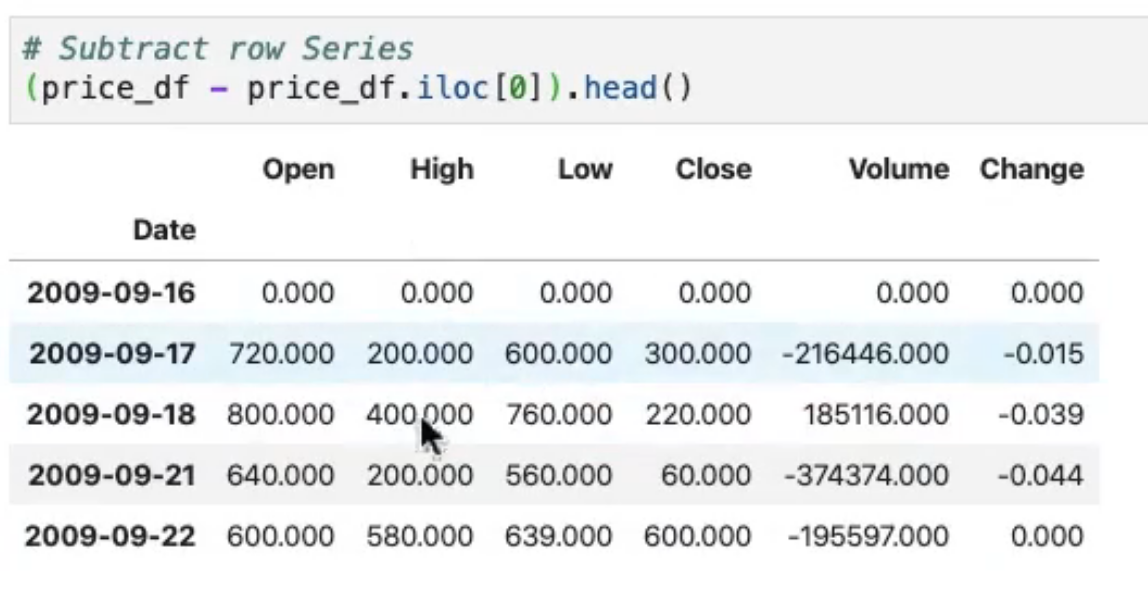

**(price_df - price_df['Open']).head()**
Subtract column Series
- [X] DataFrame의 기준인 columns와 Series의 기준인 index가 서로 불일치 (price_df['open'] - price_df도 마찬가지로 [X] )


## DataFrame & DataFrame
- index,column 이 일치하는 것 끼리만 element-wise 연산이 이루어지고 나머지는 nan 처리
- element-wise 연산 : index 와 column이 같은 element 끼리 서로 계산을 함

price_df - price_df[['Open', 'Low']].iloc[:2] 

 ## 연산 관련 pandas built-in 함수
- axis란?
- 연산은 기본적으로 "axis를 변형(줄이거나 늘리는)하는 방식" 으로 진행된다.

In [117]:
#### numpy로 맛보기

import numpy as np

a = np.array([1,2,3])
b = np.array([1,2,3])
a + b

array([2, 4, 6])

In [107]:
np.sum(
    [a,b],
    axis=0
)
# 1+1 , 2+2, 3+ 3

array([2, 4, 6])

In [108]:
np.sum(
    [a,b],
    axis=1
)
# 1+2+3, 12+3+

array([6, 6])

In [111]:
# [ [1,2,2],[1,2,2]]


# axis=0 --->       0            1
# axis=1 --->    0  1  2      0  1  2
#              [0][0]
#            [  [1, 2, 2],   [1, 2, 2] ]

# axis=0 --->              0                        1
# axis=1 --->      0       1     2          0       1      2
# axis=2 --->     0  1    0, 1    0        0, 1    0, 1    0, 1
#            [  [[1, 2], [2, 4], [2]],   [[1, 2], [2, 2], [2, 2]] ]

- Note: shift+tab을 이용해서 주석 설명을 보는 것이 가장 정확함


In [112]:
df.head(2)

,종목명,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
0,AK홀딩스,28071.479,3.787,-1.334,-374.431,-7.677,-1.421,15.120,-3245.741,43497.723,211899.220,-19.472,1.453,0.298,63200.000,56000.000
1,BGF,43342.800,4.236,3.526,1528.413,22.771,10.327,271.957,3071.872,15605.457,87779.875,28.779,5.665,1.007,44202.000,42140.000


In [113]:
df[['순이익률(%)', 'PER(배)']].sum()  # default axis=0
df[['순이익률(%)', 'PER(배)']].mean()  # default axis=0

# DataFrame - Series의 형태
# df's columns: o,h,l,c
# series's index: o,h,l,c
# => mean()값을 통해 Normalizing
# (price_df - price_df.mean()).head()

순이익률(%)    7.669
PER(배)    18.921
dtype: float64

- 아래 구문은 연산 불가능했었음

close_series = price_df['Close']

price_df - close_series

- 하지만 DataFrame이 제공하는 연산관련 함수를 이용하면 가능!

price_df.sub(close_series, axis=0).head()

    - axis=0 는 index로 맞춘다
- `sub()`의 경우 descrption에  'For Series input, axis to match Series index on'라고 써있음
     - axis=0 or 1은 무조건 descrption (shift + tab) 먼저 보고 판단하고 그 후에 "axis는 해당 axis를 변형(줄이거나, 늘리는 것)" 적용하기
     
         - 열 방향으로 'close series가 브로드캐스팅 되어 연산이 진행

- “A simple brute force solution of trying both directions until achieving the desired result is one possibility”

price_df[['Open', 'Close']].sum(axis=1).head()

price_df[['Open', 'Close']].sum(axis=0).head()

## example

In [119]:
b = pd.read_csv("../input/finance/multi_price.csv", index_col=[0])
b.head()


,AJ네트웍스,AJ렌터카,AK홀딩스,BGF,BNK금융지주,BYC,CJ,CJ CGV,CJ대한통운,CJ씨푸드,CJ제일제당,CJ헬로,CS홀딩스,DB,DB금융투자,DB손해보험,DB하이텍,DGB금융지주,DRB동일,DSR
date_time,,,,,,,,,,,,,,,,,,,,
2017-01-02,6500.000,8330.000,53100.000,41780.000,8670.000,398000.000,188000.000,69000.000,179500.000,3665.000,359000.000,9370.000,80500.000,743.000,3285.000,61800.000,16300.000,9650.000,11899.000,9350.000
2017-01-03,6500.000,8320.000,52100.000,42811.000,8590.000,399000.000,185500.000,68000.000,176500.000,3700.000,351500.000,9290.000,78800.000,742.000,3315.000,60900.000,17250.000,9600.000,11704.000,9200.000
2017-01-04,6500.000,8310.000,51100.000,42089.000,8670.000,396000.000,185000.000,71000.000,175500.000,3605.000,350500.000,9280.000,78700.000,790.000,3405.000,62600.000,17700.000,9760.000,12143.000,9080.000
2017-01-05,6500.000,8490.000,51900.000,43171.000,8700.000,397000.000,191000.000,74400.000,175500.000,3625.000,360000.000,9130.000,77900.000,802.000,3455.000,62800.000,17950.000,9740.000,12386.000,9030.000
2017-01-06,6500.000,8400.000,52100.000,43532.000,8700.000,395000.000,192500.000,74600.000,177500.000,3605.000,361000.000,9110.000,77600.000,800.000,3475.000,63000.000,18450.000,9820.000,12338.000,8730.000


In [121]:
b.loc["2018-08-09"] #series 형식

AJ네트웍스      5230.000
AJ렌터카      12000.000
AK홀딩스      74800.000
BGF         9600.000
BNK금융지주     8510.000
BYC       248000.000
CJ        142000.000
CJ CGV     58700.000
CJ대한통운    151000.000
CJ씨푸드       2760.000
CJ제일제당    341500.000
CJ헬로        9290.000
CS홀딩스      72800.000
DB           830.000
DB금융투자      4250.000
DB손해보험     66200.000
DB하이텍      16050.000
DGB금융지주    10000.000
DRB동일       6710.000
DSR         4585.000
Name: 2018-08-09, dtype: float64

In [122]:
 b.loc["2018-08-09"] / b.loc["2017-08-09"]

AJ네트웍스    0.744
AJ렌터카     1.057
AK홀딩스     1.020
BGF       0.215
BNK금융지주   0.788
BYC       0.711
CJ        0.765
CJ CGV    0.857
CJ대한통운    0.883
CJ씨푸드     0.860
CJ제일제당    0.951
CJ헬로      1.088
CS홀딩스     0.847
DB        1.142
DB금융투자    1.118
DB손해보험    0.812
DB하이텍     0.928
DGB금융지주   0.840
DRB동일     0.734
DSR       0.764
dtype: float64

In [120]:
#momentum_series 추세 지표 
momentum_series = b.loc["2018-08-09"] / b.loc["2017-08-09"] - 1
momentum_series.nlargest(3)

DB       0.142
DB금융투자   0.118
CJ헬로     0.088
dtype: float64

# Handling nan value

파이썬의 none 은 아무것도 아님을 나타내기 위함이고, numpy, 혹은 pandas의 nan은 not a number 의 약자로 숫자 값이 아니다를 나타내기 위한 예약어

pandas에서 np.nan 은 주로 float 혹은 object dtype 을 가지고 있는 series나
dataframe 에서 invalid 값을 나타낼 때 이고, 
'NaT'는 not a time 즉, datatime을 나타낼 때, invalid 한 값을 나타낼 때 쓰인다. 


np.nan == np.nan : false
None == None : true 

In [125]:
np.nan == np.nan

False

In [124]:
None == None

True

숫자와 쓰레기값 비교 시  false 

In [126]:
5 < np.nan

False

In [127]:
5 >= np.nan

False

In [128]:
5 == np.nan

False

- 아래 operation만 True를 return함 

In [129]:
np.nan != 5

True

In [131]:
df1 = pd.DataFrame(
    {
        'a':[1,2,3],
        'b':[np.nan, 4, np.nan],
    }
)

## nan이 있을 때의 boolean series 

In [132]:
df1['b'] == df1['b']

0    False
1     True
2    False
Name: b, dtype: bool

In [133]:
df1.ge(2)   # Same with (df1 >= 2)
df1.le(2)  # <=

,a,b
0,True,False
1,True,False
2,False,False


- 따라서 아래와같은 구문은 위험할 수 있음

df.shape -> (681,16)

df['PER(배)'].count() -> 668 
로 13개의 데이터 누락이 있기 때문에 nan을 checking  해야 한다. 
그리고, 데이터가 원래 nan인지, 데이터 크롤링의 실수로 nan인지 확인이 필요하다. 

In [137]:
df['PER(배)'] > 1

0      False
1       True
2       True
3       True
4       True
       ...  
676     True
677     True
678     True
679     True
680     True
Name: PER(배), Length: 681, dtype: bool

- 주의: 아래처럼 checking하면 `np.nan`의 갯수가 0개로 나옴

In [138]:
(df['PER(배)'] == np.nan).any()

False

## NaN cehcking

In [139]:
df['순이익률(%)'].isnull()
df['순이익률(%)'].isnull().sum()
df['순이익률(%)'].isnull().any()

True

In [141]:
%%timeit
df['순이익률(%)'].hasnans

99.4 µs ± 2.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [142]:
%%timeit
df['순이익률(%)'].isnull().any()

103 µs ± 961 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## for dataframe

In [143]:
df.isnull().head()

,종목명,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [144]:
# 각 항목마다 null이 있는지 확인 
df.isnull().any(axis=0)

종목명          False
매출액(억원)       True
영업이익률(%)      True
순이익률(%)       True
당기순이익(억원)     True
ROE(%)        True
ROA(%)        True
ROIC(%)       True
EPS(원)       False
BPS(원)       False
SPS(원)       False
PER(배)        True
PBR(배)       False
PSR(배)        True
price        False
price2       False
dtype: bool

In [145]:
# 데이터 프레임 내에 null 값이 하나라도 있는지 
df.isnull().any().any()

True

In [146]:

df.isnull().any().all()

False

*참고 : 두 개의 dataframe 이 같은지 판단하려면, equals 사용*

In [149]:
df1['b'] == df1['b']

0    False
1     True
2    False
Name: b, dtype: bool

In [151]:
# equals()는 nan 이 존재해도, 알아서 감안해서 비교 
# 데이터타입도 같아야 한다. 
df1['b'].equals(df1['b'])

True

## example

In [152]:
_df = pd.DataFrame({'a':[1,np.nan,3],'b':[np.nan,2,3]})
_df.head()

,a,b
0,1.000,nan
1,nan,2.000
2,3.000,3.000


둘 다 nan 이 아닌 값들만 추출  

In [153]:
#null이면 false
_df['a'].notnull()

0     True
1    False
2     True
Name: a, dtype: bool

In [155]:
#1
_df[_df['a'].notnull() & _df['b'].notnull()]

,a,b
2,3.000,3.000


In [156]:
_df.notnull()

,a,b
0,True,False
1,False,True
2,True,True


In [158]:
#2
_df[_df.notnull().all(axis=1)]

,a,b
2,3.000,3.000


In [159]:
#3
_df.dropna()

,a,b
2,3.000,3.000


In [160]:
# subset에 있는 컬럼 중에 하나라도 혹은 전부, arg로 선택가능
# null 이면 drop 한다.
_df.dropna(subset=['a']) # 'a' 컬럼이 null 인 경우에 drop

,a,b
0,1.000,nan
2,3.000,3.000
